# Week2授業課題2 富士下山問題

In [1]:
import numpy as np
csv_path = "mtfuji_data.csv" # ファイル名（パス）を指定する
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt(csv_path, delimiter=",", skiprows=1)
print(fuji[10:20])
# [地点番号, 緯度, 経度, 標高]

[[  10.         35.15098   139.103273  171.56     3222.      ]
 [  11.         35.152664  139.100392  177.84     3544.      ]
 [  12.         35.154347  139.09751   228.21     3866.      ]
 [  13.         35.15603   139.094628  275.38     4188.      ]
 [  14.         35.157714  139.091747  433.76     4511.      ]
 [  15.         35.159397  139.088865  371.74     4833.      ]
 [  16.         35.16108   139.085982  380.06     5155.      ]
 [  17.         35.162763  139.0831    503.4      5477.      ]
 [  18.         35.164446  139.080218  485.39     5799.      ]
 [  19.         35.166129  139.077335  477.82     6122.      ]]


# 問題1
## データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

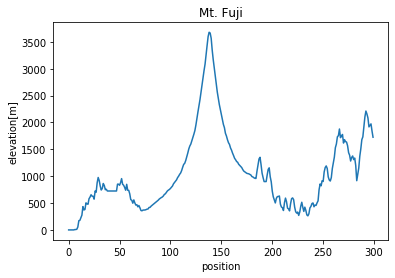

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
fig = plt.figure()
ax = plt.subplot(111)

# 0: 番号, 3: 標高
ax.set_title('Mt. Fuji')
ax.set_xlabel('position')
ax.set_ylabel('elevation[m]')
ax.plot(fuji[:, 0], fuji[:, 3])
plt.show()

# 問題2
## ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。


「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。


勾配は以下の式で求まりましたが、このデータでは「標高」がy、「その地点の番号」がxに相当します。

In [3]:
def gradient_fuji(position):
    delta_x = 1
    if position==0:
        # 0番地点の勾配は0
        delta_y = 0
    else:
        delta_y = fuji[position, 3] - fuji[position-1, 3]
    return delta_y/delta_x

print(gradient_fuji(0))
print(gradient_fuji(100))
print(gradient_fuji(200))

0.0
18.90000000000009
-171.5


# 問題3
## 移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - α　×　今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
αは0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

**《実装上の注意》**

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

**《ハイパーパラメータとは》**

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [4]:
from decimal import Decimal, ROUND_HALF_UP

ALPHA = 0.2

def move_position(position, alpha=0.2):
    position_to = position - alpha*gradient_fuji(position)
    # 正確に四捨五入を行うためDecimalモジュールを利用
    position_to_round = int(Decimal(position_to).quantize(Decimal('1'), rounding=ROUND_HALF_UP))
    # out of bounds 対策
    if 299 < position_to_round: 
        position_to_round = 299
    if 0 > position_to_round:
        position_to_round = 0
    return position_to_round

print(move_position(0, alpha=ALPHA))
print(move_position(100, alpha=ALPHA))
print(move_position(150, alpha=ALPHA))
print(move_position(200, alpha=ALPHA))

0
96
169
234


# 問題4
## 山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、 **136** 番の地点（標高3434.59m）とします。ここから山を下っていきましょう。

**《実装上の注意》**

問題3で四捨五入を行っているため、移動先の地点が今いる地点と同じ場合になることがあります。移動量が減ってきたということなので、その時点で山を下りきったと判断してください。実際の勾配降下法ではこのようなことは起きません。

In [5]:
def down_mountain(start_position, alpha=0.2):
    position_list = [start_position]
    
    for _ in range(100):
        position_list.append(move_position(position_list[-1], alpha=alpha))
        if position_list[-1] == position_list[-2]:
            break
    
    return position_list

position_list = down_mountain(136)
print(position_list)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]


# 問題5
## 下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

**《可視化例》**

- 断面図の中に移動した地点を点で表示する
- 繰り返し毎の標高や勾配を折れ線グラフにする


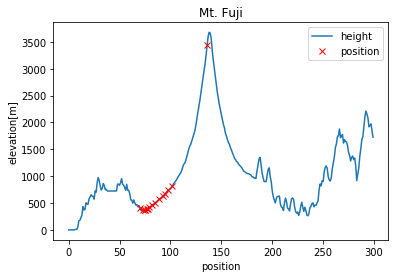

In [6]:
# 断面図の中に移動した地点を点で表示する
fig = plt.figure()
ax = plt.subplot(111)

# 0: 番号, 3: 標高
ax.set_title('Mt. Fuji')
ax.set_xlabel('position')
ax.set_ylabel('elevation[m]')
ax.plot(fuji[:, 0], fuji[:, 3], label='height')
ax.plot(position_list, [fuji[x, 3] for x in position_list], 'rx', label='position')
ax.legend()
plt.show()

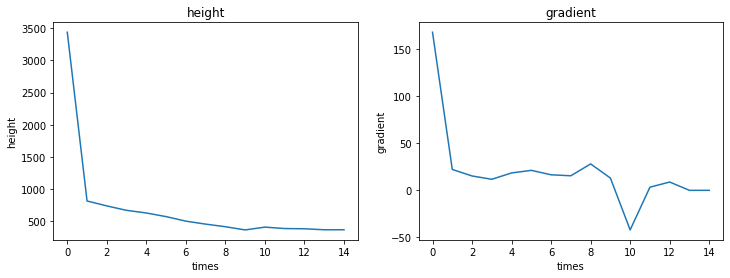

In [7]:
# 繰り返し毎の標高や勾配を折れ線グラフにする
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# 標高
ax1.set_title('height')
ax1.set_xlabel('times')
ax1.set_ylabel('height')
ax1.plot([fuji[x, 3] for x in position_list])

# 勾配
ax2.set_title('gradient')
ax2.set_xlabel('times')
ax2.set_ylabel('gradient')
ax2.plot([gradient_fuji(x) for x in position_list])

plt.show()

# 問題6
## 初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

**《初期値とは》**

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

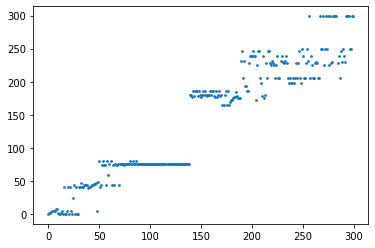

In [8]:
goal_list = []

for i in range(300):
   goal_list.append(down_mountain(i))

fig = plt.figure()
ax = plt.subplot(111)

ax.scatter([range(300)], [x[-1] for x in goal_list], s=3)
plt.show()

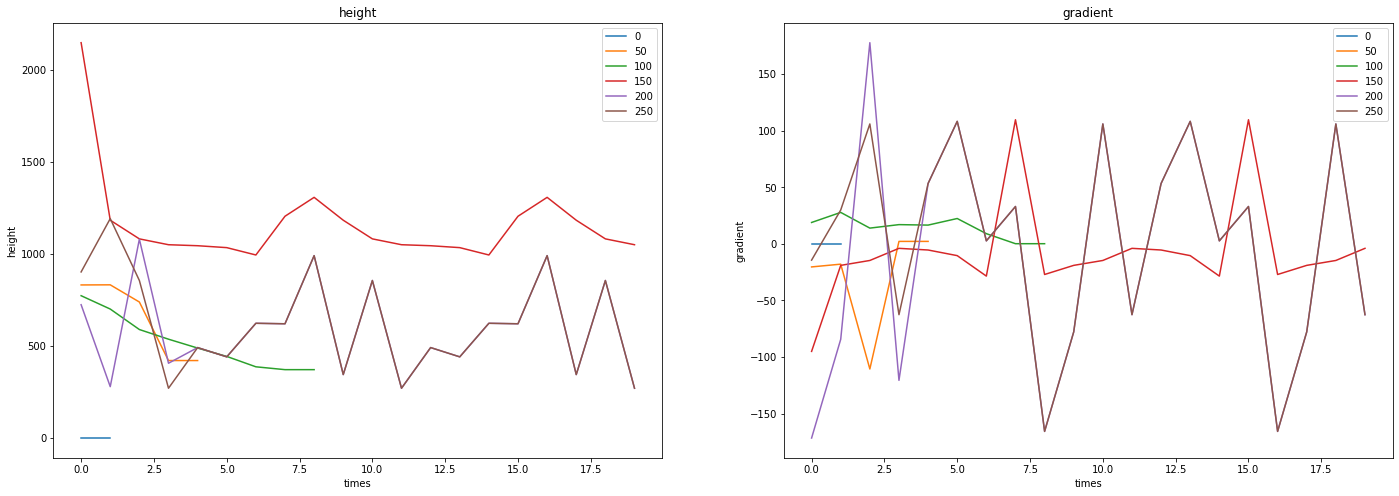

In [9]:
# 繰り返し毎の標高や勾配を折れ線グラフにする
fig = plt.figure(figsize=(24, 8))
ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

# 標高
ax1.set_title('height')
ax1.set_xlabel('times')
ax1.set_ylabel('height')

# 勾配
ax2.set_title('gradient')
ax2.set_xlabel('times')
ax2.set_ylabel('gradient')

# いくつかプロット
# 無限ループしているものもあったので前半20点だけプロット
for i in [0, 50, 100, 150, 200, 250]:

    ax1.plot([fuji[x, 3] for x in goal_list[i][:20]], label=i)
    ax2.plot([gradient_fuji(x) for x in goal_list[i][:20]], label=i)

ax1.legend()
ax2.legend()

plt.show()